In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GR_v10_Tested.csv")

In [4]:
df.head()

,survey_region,survey_version,weight,Finished,RecordedDate,intro1,intro2,A1,A2_2_1,A2_2_2,B2,B4,V4_2,C9,E6,E5,Q_Language,Q_TotalDuration,GID_0,GID_1,ISO_3,NAME_0,NAME_1,country_agg,country_region_numeric,region_agg,X1w_0unw,ISO2,date_from_file,date,Unnamed..0,age,B1_1.-77,B1_1.1,B1_1.2,B1_2.-77,B1_2.1,B1_2.2,B1_3.-77,B1_3.1,...,D10.3,D10.4,D10.5,D10.6,D10.7,D10.8,D10.9,D10.10,D10.11,D10.12,D10.13,D10.14,D10.15,E3.-99,E3.-77,E3.1,E3.2,E3.3,E3.4,E4.-99,E4.-77,E4.1,E4.2,E4.3,E4.4,E4.5,E4.6,E4.7,E2.-99,E2.-77,E2.1,E2.2,E2.3,E7.-99,E7.-77,E7.1,E7.2,E7.3,E7.4,E7.5
0,EU,10,5933.740672,0,2021-03-02T05:11:44Z,1,1,1,1179,1181,-99.0,-99,NaN,NaN,-99.0,-99.0,EL,597,GRC,GRC.6_1,GRC,Greece,Macedonia and Thrace,Greece,1181,Anatoliki Makedonia Thraki,1,GR,2021-03-02,2021-03-02,NaN,-99,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,EU,10,12506.015409,0,2021-03-02T08:52:06Z,1,1,1,1179,1181,-99.0,-99,NaN,NaN,-99.0,-99.0,EL,698,GRC,GRC.6_1,GRC,Greece,Macedonia and Thrace,Greece,1181,Anatoliki Makedonia Thraki,1,GR,2021-03-02,2021-03-02,NaN,-99,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,EU,10,5296.731086,1,2021-03-02T00:23:37Z,1,1,1,1179,1182,5.0,-99,NaN,NaN,15.0,1.0,EL,1017,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,5,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,EU,10,12108.720384,1,2021-03-02T00:22:43Z,1,1,1,1179,1182,-99.0,-99,NaN,NaN,16.0,1.0,EN-GB,845,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,7,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,EU,10,4943.455778,1,2021-03-02T00:26:15Z,1,1,1,1179,1182,-99.0,-99,NaN,NaN,3.0,3.0,EL,957,GRC,GRC.3_1,GRC,Greece,Attica,Greece,1182,Attiki,1,GR,2021-03-02,2021-03-02,NaN,5,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [5]:
df.tail()

,survey_region,survey_version,weight,Finished,RecordedDate,intro1,intro2,A1,A2_2_1,A2_2_2,B2,B4,V4_2,C9,E6,E5,Q_Language,Q_TotalDuration,GID_0,GID_1,ISO_3,NAME_0,NAME_1,country_agg,country_region_numeric,region_agg,X1w_0unw,ISO2,date_from_file,date,Unnamed..0,age,B1_1.-77,B1_1.1,B1_1.2,B1_2.-77,B1_2.1,B1_2.2,B1_3.-77,B1_3.1,...,D10.3,D10.4,D10.5,D10.6,D10.7,D10.8,D10.9,D10.10,D10.11,D10.12,D10.13,D10.14,D10.15,E3.-99,E3.-77,E3.1,E3.2,E3.3,E3.4,E4.-99,E4.-77,E4.1,E4.2,E4.3,E4.4,E4.5,E4.6,E4.7,E2.-99,E2.-77,E2.1,E2.2,E2.3,E7.-99,E7.-77,E7.1,E7.2,E7.3,E7.4,E7.5
17709,EU,10,18401.936658,1,2021-05-17T00:25:44Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,4.0,3.0,EL,602,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,2,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
17710,EU,10,6443.086421,1,2021-05-17T08:43:23Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,18.0,3.0,EN,434,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17711,EU,10,7592.378865,1,2021-05-17T00:13:43Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,15.0,0.0,EL,430,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,4,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
17712,EU,10,7017.825984,1,2021-05-17T03:32:07Z,1,1,1,1179,1193,-99.0,-99,NaN,NaN,18.0,3.0,EL,391,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,3,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17713,EU,10,10288.469859,1,2021-05-17T01:28:27Z,1,1,1,1179,1193,3.0,3,NaN,NaN,15.0,2.0,EL,360,GRC,GRC.1_1,GRC,Greece,Aegean,Greece,1193,Voreio Aigaio,1,GR,2021-05-17,2021-05-17,NaN,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [6]:
df.shape

(17714, 735)

# Pre-processing dataframe

In [7]:
# Delete NA
col_names = ['B1_1.-77','B1_2.-77','B1_3.-77','B1_4.-77','B1_5.-77','B1_6.-77','B1_7.-77','B1_8.-77','B1_9.-77','B1_10.-77','B1_11.-77','B1_12.-77']

for i in range(len(col_names)):
  df = df.drop(df[df[col_names[i]]==1].index)

In [8]:
df.shape

(17499, 735)

In [9]:
# dataframe without NA
df1 = df

In [10]:
# dataframe with NA

df_NA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GR_v10_Tested.csv")

# Creating our dataframe

In [11]:
#df_ok = df[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B1_13.1','B1_14.1','B8.1']]

df1_ok = df1[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1']]

df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1']]

In [12]:
df1_ok.shape

(17499, 13)

In [13]:
df_ok_NA.shape

(17714, 25)

# Data Visualization

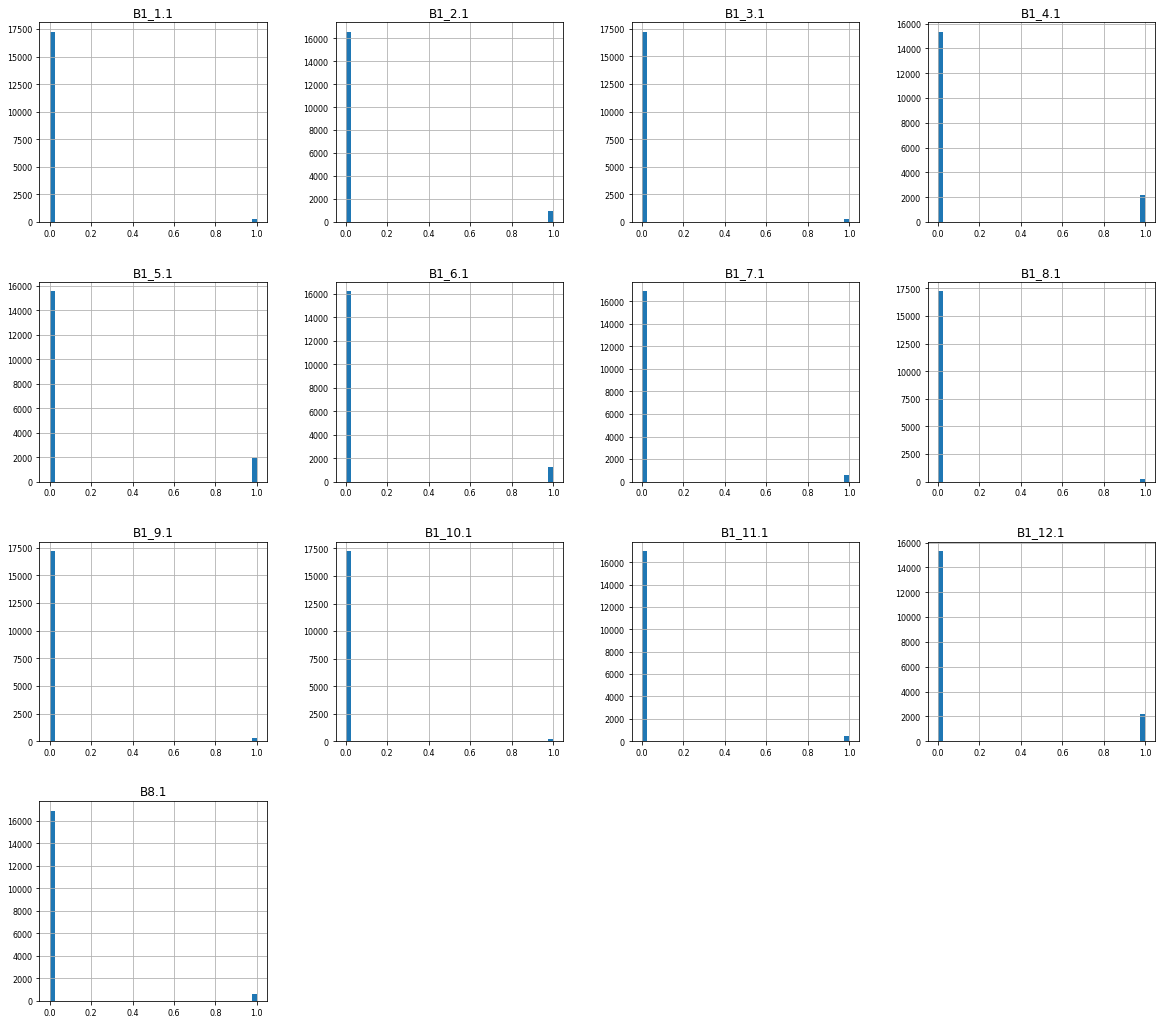

In [14]:
df1_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

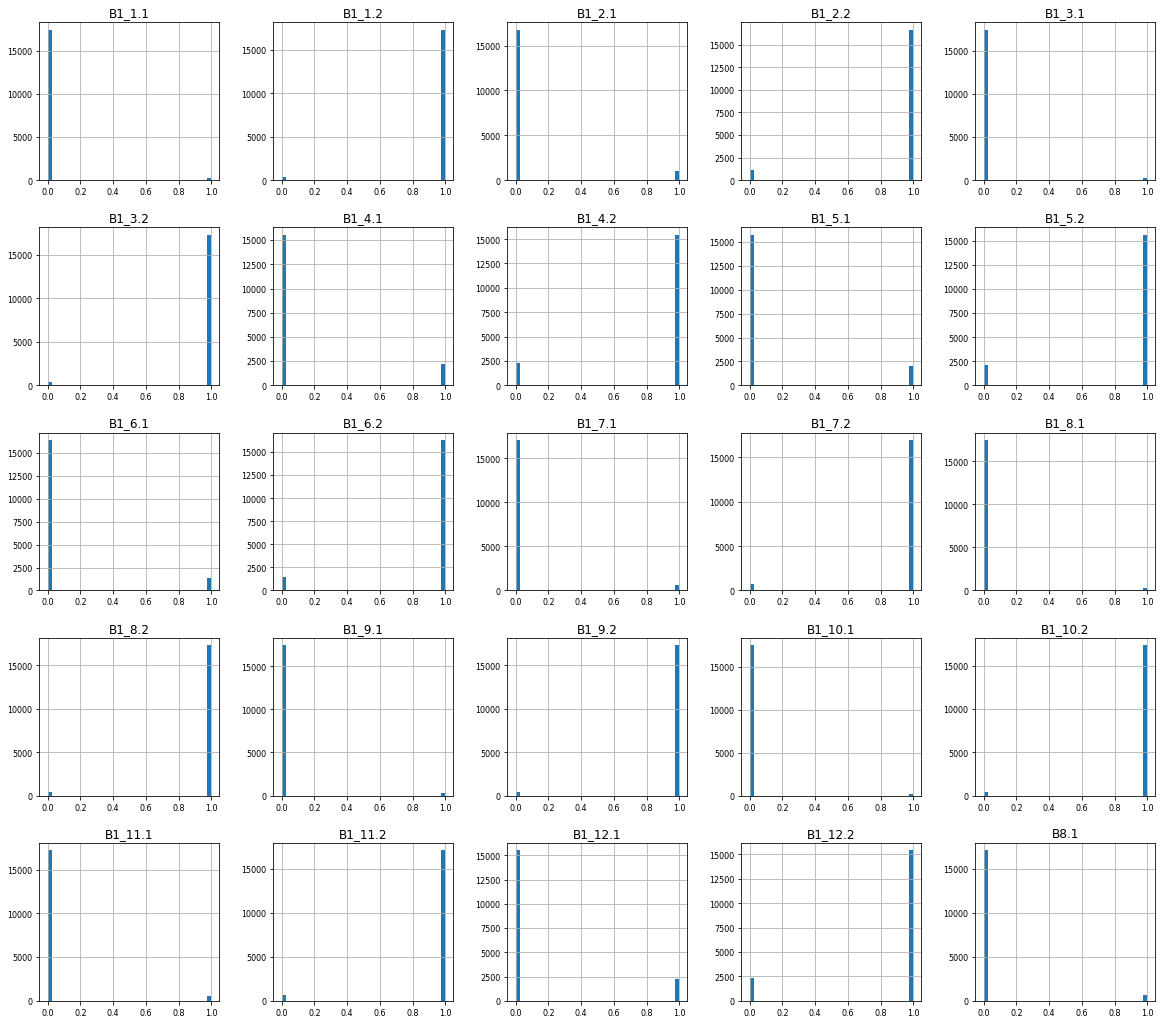

In [15]:
df_ok_NA.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

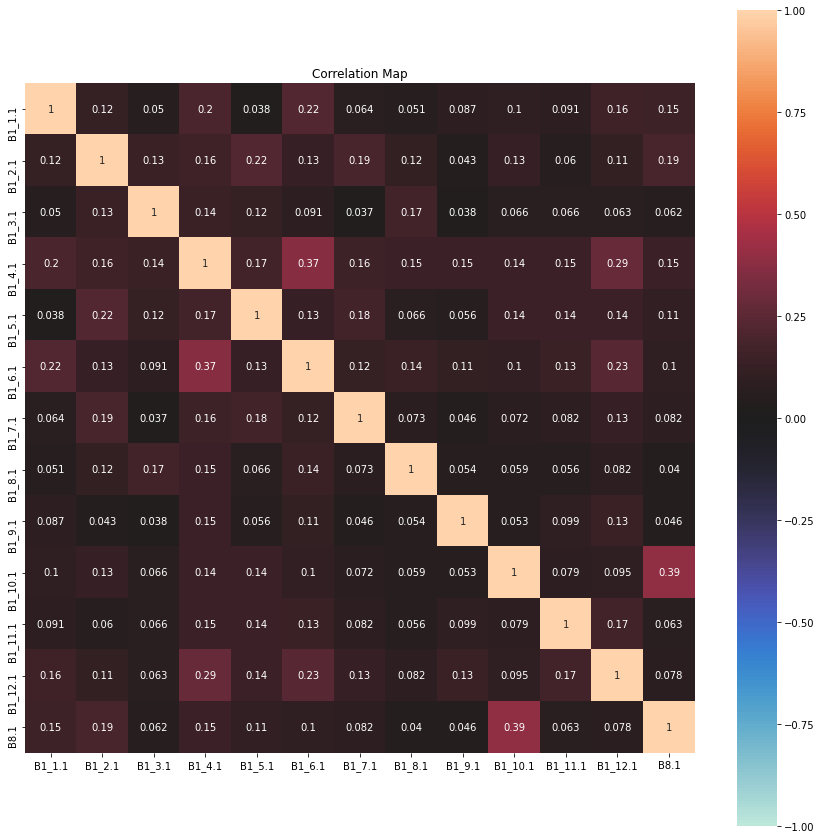

In [16]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df1_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

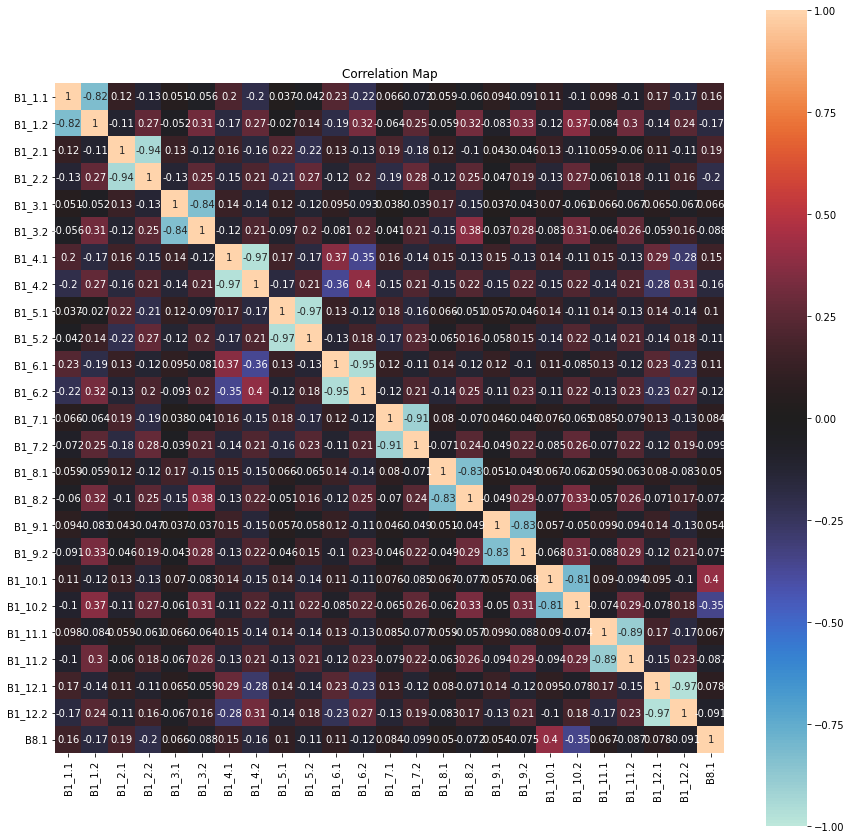

In [17]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok_NA.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65549b1f90>]],
      dtype=object)

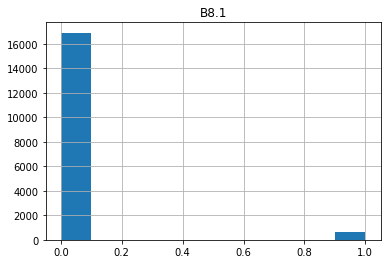

In [18]:
df1_ok.hist('B8.1')

In [ ]:
df_ok_NA.hist('B8.1')

# Training & Test

In [20]:
X = df1_ok.drop(['B8.1'], axis=1)
Y = df1_ok['B8.1']

X_NA = df_ok_NA.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA['B8.1']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(13999, 12)
(3500, 12)
(13999,)
(3500,)

(14171, 24)
(3543, 24)
(14171,)
(3543,)


In [23]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

'\nX_norm = preprocessing.scale(X_train)\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_train_norm = scaler.transform(X_train)\nX_test_norm = scaler.transform(X_test)\nprint(X_train_norm.shape)\nprint(X_test_norm.shape)\n'

## Decision Tree

### df1_ok

In [24]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [25]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50}


Accuracy: 0.9682857142857143
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3381
           1       0.59      0.23      0.33       119

    accuracy                           0.97      3500
   macro avg       0.78      0.61      0.66      3500
weighted avg       0.96      0.97      0.96      3500

[[3362   19]
 [  92   27]]


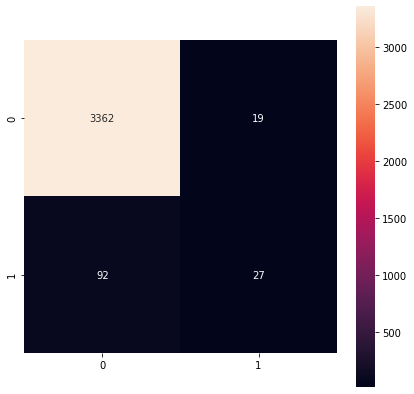

In [26]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [27]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

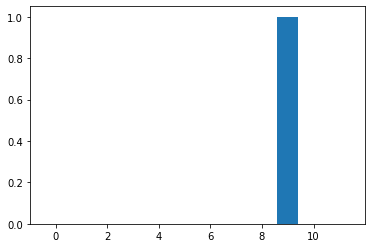

In [28]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_df1_ok.png')

True

### df_ok_NA

In [30]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [31]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50}


Accuracy: 0.9709285915890489
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3425
           1       0.67      0.25      0.36       118

    accuracy                           0.97      3543
   macro avg       0.82      0.62      0.67      3543
weighted avg       0.96      0.97      0.96      3543

[[3411   14]
 [  89   29]]


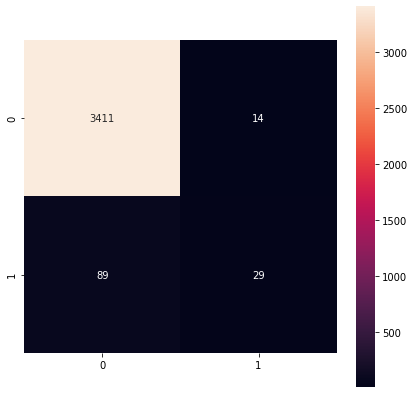

In [32]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_model_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [33]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

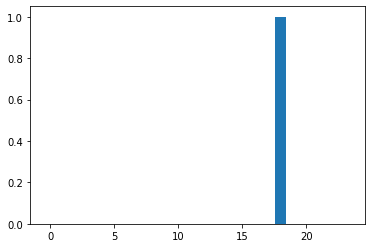

In [34]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [35]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2']
dot_data = export_graphviz(my_tree_NA,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_df_ok_NA.png')

True

## Random Forest

### df1_ok

In [36]:
rfc=RandomForestClassifier(random_state=42)

In [37]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [38]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [39]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [40]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [41]:
y_pred = RF.predict(X_test)

Accuracy: 0.9685714285714285
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3381
           1       0.62      0.19      0.29       119

    accuracy                           0.97      3500
   macro avg       0.80      0.59      0.64      3500
weighted avg       0.96      0.97      0.96      3500

[[3367   14]
 [  96   23]]


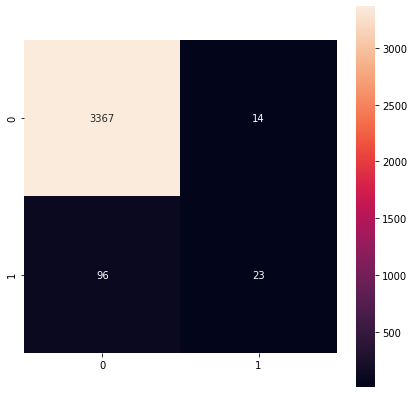

In [42]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

### df_ok_NA

In [43]:
rfc_NA=RandomForestClassifier(random_state=42)

In [44]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [45]:
CV_rfc_NA = GridSearchCV(estimator=rfc_NA, param_grid=param_grid, cv= 3)
CV_rfc_NA.fit(X_train_NA, Y_train_NA)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [46]:
CV_rfc_NA.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [47]:
my_model_NA = CV_rfc_NA.best_estimator_
RF_NA =my_model_NA.fit(X_train_NA, Y_train_NA)

In [48]:
y_pred_NA = RF_NA.predict(X_test_NA)

Accuracy: 0.969799604854643
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3425
           1       0.63      0.22      0.33       118

    accuracy                           0.97      3543
   macro avg       0.80      0.61      0.66      3543
weighted avg       0.96      0.97      0.96      3543

[[3410   15]
 [  92   26]]


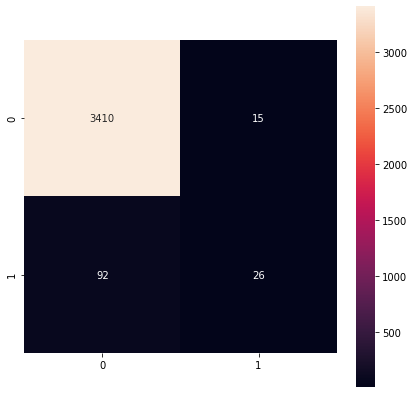

In [49]:
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_pred_NA))

## KNN

### df1_ok

In [50]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model=KNeighborsClassifier()

grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 5}


In [51]:
my_model = grid.best_estimator_

Accuracy: 0.9677142857142857
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3381
           1       0.59      0.17      0.26       119

    accuracy                           0.97      3500
   macro avg       0.78      0.58      0.62      3500
weighted avg       0.96      0.97      0.96      3500

[[3367   14]
 [  99   20]]


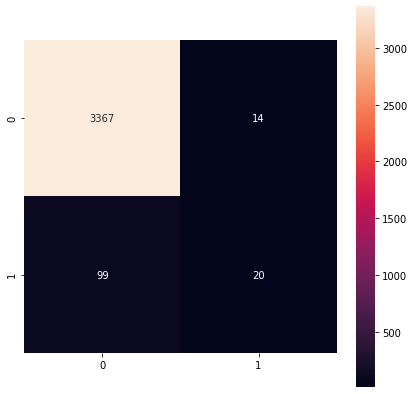

In [52]:
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()


### df_ok_NA

In [53]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model_NA=KNeighborsClassifier()

grid_NA = GridSearchCV(kNN_model_NA, param_grid, cv = 3, scoring = 'accuracy')
grid_NA.fit(X_train_NA,Y_train_NA)
print(grid_NA.best_params_)

{'n_neighbors': 5}


In [54]:
my_model_NA = grid_NA.best_estimator_

Accuracy: 0.9666948913350268
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3425
           1       0.50      0.11      0.18       118

    accuracy                           0.97      3543
   macro avg       0.74      0.55      0.58      3543
weighted avg       0.95      0.97      0.96      3543

[[3412   13]
 [ 105   13]]


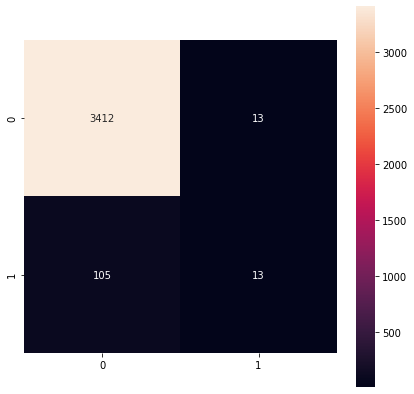

In [55]:
my_model_NA.fit(X_train_NA, Y_train_NA)
y_predicted_NA = my_model_NA.predict(X_test_NA)
print('Accuracy:',accuracy_score(Y_test_NA, y_predicted_NA))
print(classification_report(Y_test_NA, y_predicted_NA))

matrix = confusion_matrix(Y_test_NA, y_predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## SVM

### df1_ok

In [56]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.9682857142857143
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3381
           1       0.59      0.23      0.33       119

    accuracy                           0.97      3500
   macro avg       0.78      0.61      0.66      3500
weighted avg       0.96      0.97      0.96      3500

[[3362   19]
 [  92   27]]


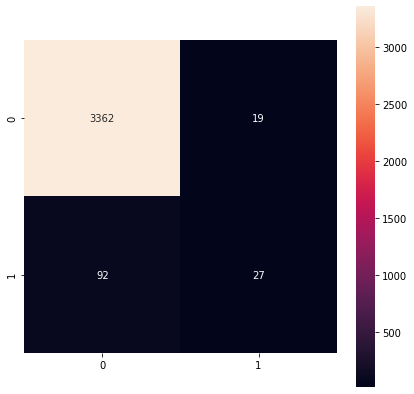

In [58]:
y_pred = grid.predict(X_test)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [59]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_NA = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid_NA.fit(X_train_NA, Y_train_NA)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
# print best parameter after tuning
print(grid_NA.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_NA.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.9709285915890489
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3425
           1       0.67      0.25      0.36       118

    accuracy                           0.97      3543
   macro avg       0.82      0.62      0.67      3543
weighted avg       0.96      0.97      0.96      3543

[[3411   14]
 [  89   29]]


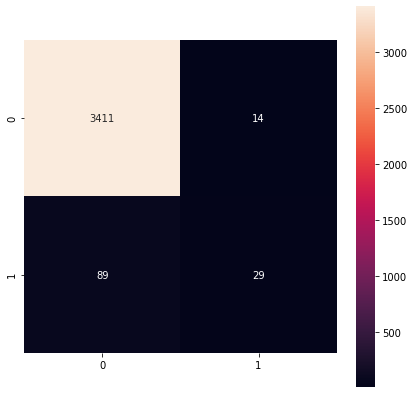

In [61]:
y_pred_NA = grid_NA.predict(X_test_NA)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))

matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network

### df1_ok

In [62]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 17499
    Positive: 596 (3.41% of total)



In [63]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.68


In [64]:
def baseline_model():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [65]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
25/25 [==============================] - 19s 33ms/step - loss: 0.8663 - binary_accuracy: 0.5262 - val_loss: 0.6875 - val_binary_accuracy: 0.7864
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.7479 - binary_accuracy: 0.6072 - val_loss: 0.6794 - val_binary_accuracy: 0.9629
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6682 - binary_accuracy: 0.6490 - val_loss: 0.6748 - val_binary_accuracy: 0.9543
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6336 - binary_accuracy: 0.6149 - val_loss: 0.6592 - val_binary_accuracy: 0.9671
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6068 - binary_accuracy: 0.7507 - val_loss: 0.6554 - val_binary_accuracy: 0.9643
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5604 - binary_ac

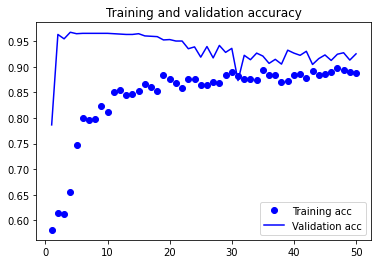

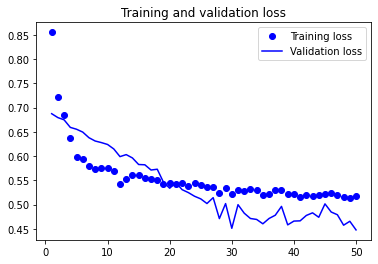

In [66]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

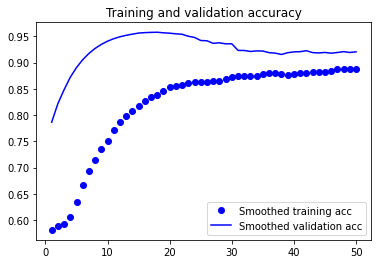

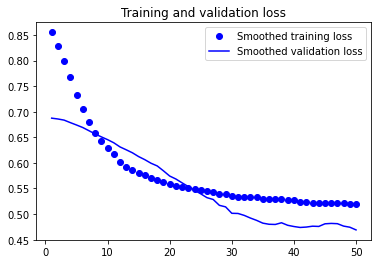

In [67]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [68]:
model.evaluate(X_test, Y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.4535 - binary_accuracy: 0.9269


[0.4534618556499481, 0.9268571138381958]

Total accuracy: 92.68571428571428 %
[[3196  185]
 [  71   48]]


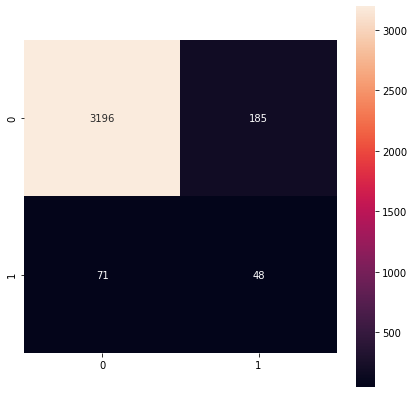

In [69]:
predicted = np.array([int(x[0] > 0.5) for x in model.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [70]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 17714
    Positive: 627 (3.54% of total)



In [71]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.13


In [72]:
def baseline_model_NA():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [73]:
model_NA = baseline_model_NA()

history = model_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
25/25 [==============================] - 2s 25ms/step - loss: 0.9133 - binary_accuracy: 0.5394 - val_loss: 0.6300 - val_binary_accuracy: 0.9661
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.7562 - binary_accuracy: 0.6191 - val_loss: 0.6504 - val_binary_accuracy: 0.9676
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6721 - binary_accuracy: 0.6247 - val_loss: 0.6165 - val_binary_accuracy: 0.9690
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6671 - binary_accuracy: 0.6923 - val_loss: 0.6235 - val_binary_accuracy: 0.9669
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6467 - binary_accuracy: 0.7355 - val_loss: 0.6052 - val_binary_accuracy: 0.9669
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6171 - binary_accuracy: 0.7815 - val_loss: 0.6183 - val_binary_accuracy: 0.9661
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6

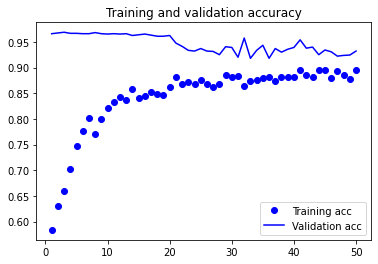

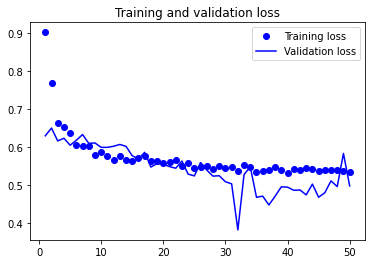

In [74]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

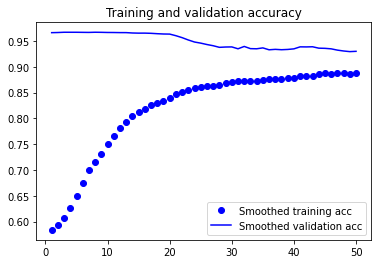

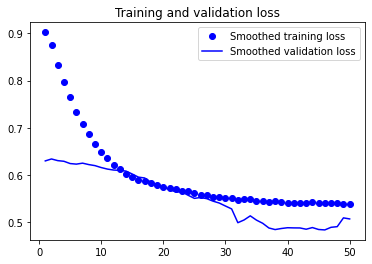

In [75]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [76]:
model_NA.evaluate(X_test_NA, Y_test_NA)

111/111 [==============================] - 0s 2ms/step - loss: 0.4889 - binary_accuracy: 0.9292


[0.48888322710990906, 0.9291560649871826]

Total accuracy: 92.91560824160317 %
[[3242  183]
 [  68   50]]


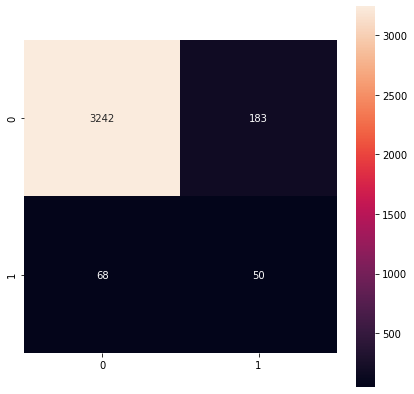

In [77]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network V2

### df1_ok

In [78]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 17499
    Positive: 596 (3.41% of total)



In [79]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.68


In [80]:
def baseline_model2():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [81]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 0.7970 - binary_accuracy: 0.7077 - val_loss: 0.6758 - val_binary_accuracy: 0.7386
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7994 - binary_accuracy: 0.7283 - val_loss: 0.6567 - val_binary_accuracy: 0.8100
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6596 - binary_accuracy: 0.7548 - val_loss: 0.6121 - val_binary_accuracy: 0.8821
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6698 - binary_accuracy: 0.7826 - val_loss: 0.5858 - val_binary_accuracy: 0.9121
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6563 - binary_accuracy: 0.8040 - val_loss: 0.5634 - val_binary_accuracy: 0.9136
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6336 - binary_accuracy: 0.8195 - val_loss: 0.5468 - val_binary_accuracy: 0.9186
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6

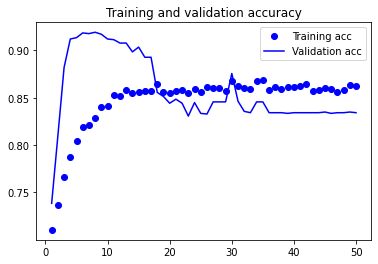

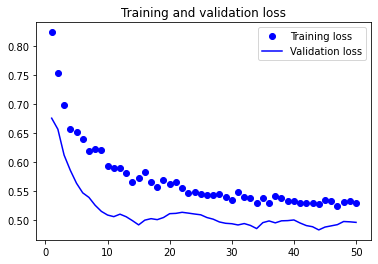

In [82]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

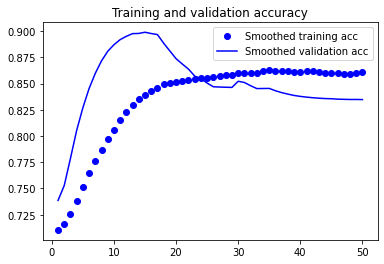

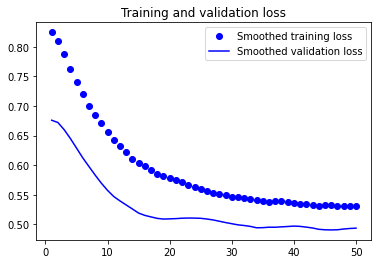

In [83]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [84]:
model2.evaluate(X_test, Y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.4985 - binary_accuracy: 0.8437


[0.4984709620475769, 0.8437142968177795]

Total accuracy: 84.37142857142858 %
[[2890  491]
 [  56   63]]


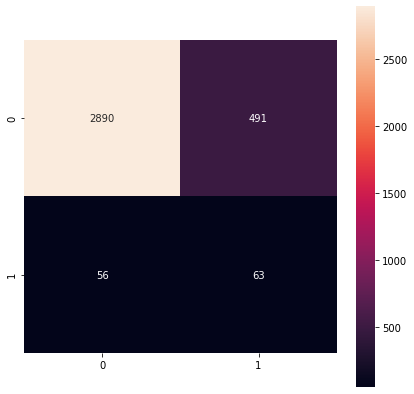

In [85]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [86]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 17714
    Positive: 627 (3.54% of total)



In [87]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.13


In [88]:
def baseline_model2_NA():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [89]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 0.7952 - binary_accuracy: 0.7046 - val_loss: 0.6129 - val_binary_accuracy: 0.8449
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6886 - binary_accuracy: 0.7811 - val_loss: 0.5110 - val_binary_accuracy: 0.9563
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6659 - binary_accuracy: 0.8052 - val_loss: 0.4689 - val_binary_accuracy: 0.9619
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6348 - binary_accuracy: 0.8190 - val_loss: 0.4425 - val_binary_accuracy: 0.9605
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6407 - binary_accuracy: 0.8232 - val_loss: 0.4441 - val_binary_accuracy: 0.9598
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6280 - binary_accuracy: 0.8333 - val_loss: 0.4194 - val_binary_accuracy: 0.9577
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6

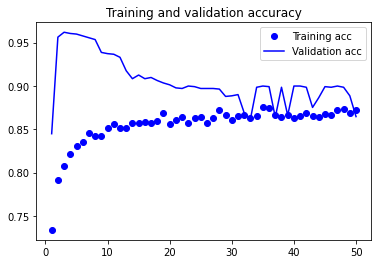

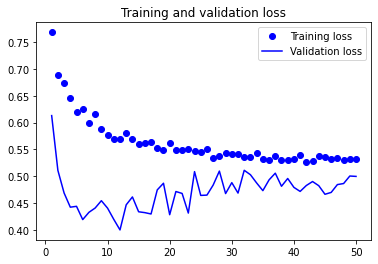

In [90]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

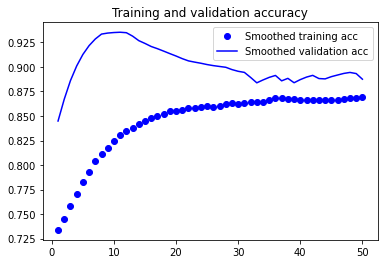

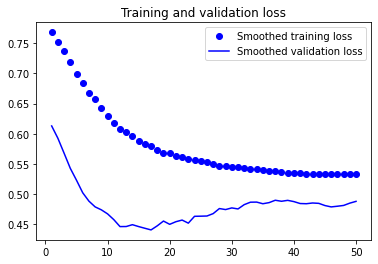

In [91]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [92]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

111/111 [==============================] - 0s 2ms/step - loss: 0.4826 - binary_accuracy: 0.8651


[0.4826192259788513, 0.8650860786437988]

Total accuracy: 86.50860852384984 %
[[3000  425]
 [  53   65]]


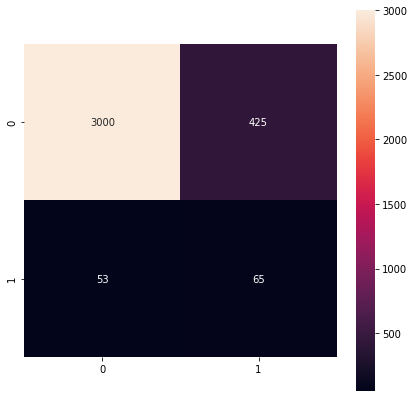

In [94]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()